In [126]:
import requests, json, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.cross_validation import train_test_split

In [2]:
def clarity_to_score(x):
    if x == 'SI2':
        return 1
    if x == 'SI1':
        return 2
    if x == 'VS2':
        return 3
    if x == 'VS1':
        return 4
    if x == 'VVS2':
        return 5
    if x == 'VVS1':
        return 6
    if x == 'IF':
        return 7
    if x == 'FL':
        return 8
    
def color_to_score(x):
    if x == 'J':
        return 1
    if x == 'I': 
        return 2
    if x == 'H':
        return 3
    if x == 'G':
        return 4
    if x == 'F':
        return 5
    if x == 'E':
        return 6
    if x == 'D':
        return 7
    
def cut_to_dummy(x):
    if x == "Very Good":
        return "Very_Good"
    if x == "Super Ideal":
        return "Super_Ideal"
    else:
        return x

In [3]:
url = "http://www.brilliantearth.com/loose-diamonds/list/?shapes=Oval&cuts=Fair%2CGood%2CVery+Good%2CIdeal%2CSuper+Ideal&colors=J%2CI%2CH%2CG%2CF%2CE%2CD&clarities=SI2%2CSI1%2CVS2%2CVS1%2CVVS2%2CVVS1%2CIF%2CFL&polishes=Good%2CVery+Good%2CExcellent&symmetries=Good%2CVery+Good%2CExcellent&fluorescences=Very+Strong%2CStrong%2CMedium%2CFaint%2CNone&min_carat=1.00&max_carat=2.51&min_table=45.00&max_table=85.00&min_depth=0.00&max_depth=83.10&min_price=720&max_price=25000&stock_number=&row=0&requestedDataSize=100&order_by=price&order_method=desc&currency=%24&min_ratio=1.00&max_ratio=2.75&shipping_day=&MIN_PRICE=720&MAX_PRICE=226620&MIN_CARAT=0.3&MAX_CARAT=5.06&MIN_TABLE=45&MAX_TABLE=85&MIN_DEPTH=0&MAX_DEPTH=83.1"
url_2 = "http://www.brilliantearth.com/loose-diamonds/list/?shapes=Round%2CPrincess%2CCushion%2CAsscher%2CMarquise%2COval%2CRadiant%2CPear%2CEmerald%2CHeart&cuts=Fair%2CGood%2CVery+Good%2CIdeal%2CSuper+Ideal&colors=H%2CG%2CF%2CE%2CD&clarities=SI2%2CSI1%2CVS2%2CVS1%2CVVS2%2CVVS1%2CIF%2CFL&polishes=Good%2CVery+Good%2CExcellent&symmetries=Good%2CVery+Good%2CExcellent&fluorescences=Very+Strong%2CStrong%2CMedium%2CFaint%2CNone&min_carat=1.00&max_carat=2.00&min_table=45.00&max_table=85.00&min_depth=0.00&max_depth=83.10&min_price=720&max_price=226620&stock_number=&row=0&requestedDataSize=5000&order_by=price&order_method=desc&currency=%24&min_ratio=1.00&max_ratio=2.75&shipping_day=&MIN_PRICE=540&MAX_PRICE=2750970&MIN_CARAT=0.25&MAX_CARAT=18.75&MIN_TABLE=45&MAX_TABLE=85&MIN_DEPTH=0&MAX_DEPTH=83.1"

In [4]:
#Grab API Response at the url passed in
r = requests.get(url_2)

In [5]:
data = r.json()
diamonds = data['diamonds']
data_test = json.loads(r.text)
data_test = data_test['diamonds']

In [6]:
data_test

[{'_version_': 1526502073315622916,
  'active': True,
  'be_price': 33809.6,
  'carat': 1.76,
  'clarity': 'VVS1',
  'clarity_order': 6,
  'collection': 'Glacier',
  'collection_order': 3,
  'color': 'D',
  'color_order': 7,
  'culet': 'Pointed',
  'cut': 'Super Ideal',
  'cut_order': 6,
  'depth': 60.5,
  'fluorescence': 'None',
  'girdle': 'Medium',
  'id': 1884917,
  'is_memo': False,
  'length': 7.855,
  'length_width_ratio': 1.0,
  'measurements': '7.87 x 7.84 x 4.75',
  'orderby': 'Monday February 22, 2016 by 2:00 PM PT',
  'orderby_short': '2 PM PT tomorrow',
  'origin': 'Russia',
  'polish': 'Excellent',
  'price': 39800,
  'price_exact': '39800.0',
  'product_class_exact': 'Loose Diamonds',
  'rap_percent': -11.9,
  'real_diamond_image': True,
  'receiveby': 'Monday, February 29',
  'receiveby_short': 'Mon, Feb 29',
  'report': 'GIA',
  'report_order': 4,
  'shape': 'Round',
  'shipping_day': 5,
  'shipping_supplier': 'JB',
  'suggestions': '1791031AN\n1.76 Carat Round Diamond

In [7]:
carat = list()
price = list()
clarity = list()
color = list()
cut = list()
shape = list()
for i in data_test:
    carat.append(i['carat'])
    price.append(i['price'])
    clarity.append(i['clarity'])
    color.append(i['color'])
    cut.append(i['cut'])
    shape.append(i['shape'])

In [8]:
df = pd.DataFrame({"carat": carat,
                   "price" : price,
                   "clarity" : clarity,
                   "color" : color,
                   "cut" : cut,
                   "shape" : shape})
df['cut'] = df['cut'].apply(cut_to_dummy)
df

,carat,clarity,color,cut,price,shape
0,1.76,VVS1,D,Super_Ideal,39800,Round
1,2.00,VVS2,E,Ideal,39670,Round
2,2.00,VVS2,E,Ideal,39430,Round
3,1.90,IF,D,Super_Ideal,38490,Round
4,1.90,IF,D,Super_Ideal,38490,Round
5,1.65,FL,D,Super_Ideal,38280,Round
6,1.80,IF,E,Super_Ideal,35470,Round
7,1.70,VVS1,D,Super_Ideal,34990,Round
8,1.70,IF,D,Super_Ideal,34680,Round
9,2.00,IF,E,Very_Good,34610,Round


In [9]:
data_for_regression = pd.get_dummies(df)
data_for_regression.columns
#Drop the lowest value of dummies
data_for_regression.drop(['clarity_SI2', 'color_H', 'cut_Fair','shape_Round'], axis = 1, inplace = True)
data_for_regression.columns

Index(['carat', 'price', 'clarity_FL', 'clarity_IF', 'clarity_SI1',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D',
       'color_E', 'color_F', 'color_G', 'cut_Good', 'cut_Ideal',
       'cut_Super_Ideal', 'cut_Very_Good', 'shape_Asscher', 'shape_Cushion',
       'shape_Emerald', 'shape_Heart', 'shape_Marquise', 'shape_Oval',
       'shape_Pear', 'shape_Princess', 'shape_Radiant'],
      dtype='object')

In [10]:
lm = smf.ols(formula= 'price ~ + np.power(carat,2) \
                        + clarity_IF + clarity_SI1 + clarity_VS1 + clarity_VS1 + clarity_VVS1 + clarity_VVS2 \
                        + color_D +color_E + color_F + color_G \
                        + cut_Very_Good + cut_Ideal \
                        + shape_Asscher + shape_Cushion + shape_Emerald + shape_Heart + shape_Marquise \
                        + shape_Oval + shape_Pear + shape_Princess + shape_Radiant \
                        + cut_Very_Good*carat + carat*cut_Ideal + carat*cut_Super_Ideal' , data=data_for_regression).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1099.
Date:                Sun, 21 Feb 2016   Prob (F-statistic):               0.00
Time:                        15:13:54   Log-Likelihood:                -44655.
No. Observations:                5000   AIC:                         8.936e+04
Df Residuals:                    4973   BIC:                         8.954e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept             -1458.3144    770.198     -1.893      0.058     -2968.243    51.614
np.power(carat, 2)     4388.6264    389.811     11.258      0.000      3624.424  5152.828
clarity_IF             3969.8331    110.547     35.911      0.000      3753.111  4186.555
clarity_SI1            -358.8300     79.388     -4.520      0.000      -514.465  -203.195
clarity_VS1            1098.7792     76.596     14.345      0.000       948.618  1248.940
clarity_VVS1           2656.0877     84.705     31.357      0.000      2490.029  2822.146
clarity_VVS2           1766.4379     88.040     20.064      0.000      1593.842  1939.034
color_D                4184.4230     93.923     44.552      0.000      4000.293  4368.553
color_E                2805.9888     86.833     32.315      0.000      2635.757  2976.221
color_F                2100.4501     84.064     24.986      0.000      1935.648  2265.252
color_G                1218.7524     84.805     14.371      0.000      1052.496  1385.008
cut_Very_Good          1094.8665    387.312      2.827      0.005       335.564  1854.169
cut_Ideal              1923.3319    402.476      4.779      0.000      1134.302  2712.362
shape_Asscher         -3675.8391    165.378    -22.227      0.000     -4000.053 -3351.625
shape_Cushion         -3051.1344    100.504    -30.358      0.000     -3248.166 -2854.103
shape_Emerald         -3944.7698    112.660    -35.015      0.000     -4165.632 -3723.907
shape_Heart           -2868.4878    137.100    -20.923      0.000     -3137.264 -2599.711
shape_Marquise        -2910.4614    264.503    -11.004      0.000     -3429.003 -2391.919
shape_Oval            -1933.0218    134.973    -14.322      0.000     -2197.628 -1668.416
shape_Pear            -2415.9027    127.975    -18.878      0.000     -2666.790 -2165.016
shape_Princess        -2575.2847     95.549    -26.953      0.000     -2762.603 -2387.967
shape_Radiant         -2952.5029    198.928    -14.842      0.000     -3342.489 -2562.517
carat                  2012.8228   1112.839      1.809      0.071      -168.833  4194.479
cut_Very_Good:carat    -774.6982    322.204     -2.404      0.016     -1406.361  -143.035
carat:cut_Ideal       -1161.4496    328.875     -3.532      0.000     -1806.190  -516.709
cut_Super_Ideal         230.7168    375.028      0.615      0.538      -504.503   965.937
carat:cut_Super_Ideal   930.2570    312.875      2.973      0.003       316.884  1543.630
==============================================================================
Omnibus:                     2031.127   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25238.892
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                      13.537   Cond. No.                  

In [130]:
X = data_for_regression.drop('price', axis = 1)
y = data_for_regression['price']
test_size_range = list(np.arange(0.05,1,0.05))
answer_list = list()

for t in test_size_range:
    for i in range(0,1000):
        test_list = list()
        for_analysis = pd.DataFrame()
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= t)
        test_results = smf.OLS(y_train, X_train).fit()
        y_test_predict = test_results.predict(X_test)
        for_analysis = pd.DataFrame({'y_test' : y_test, 
                                 'y_test_hat' : y_test_predict})
        for_analysis['error'] = for_analysis['y_test_hat'] - for_analysis['y_test']
        n = len(for_analysis.index)
        for_analysis['Squared Error'] = for_analysis['error']**2
        MSE = sum(for_analysis['Squared Error']) / n
        test_list.append(MSE)
    ans = sum(test_list) / len(test_list)
    answer_list.append(ans)

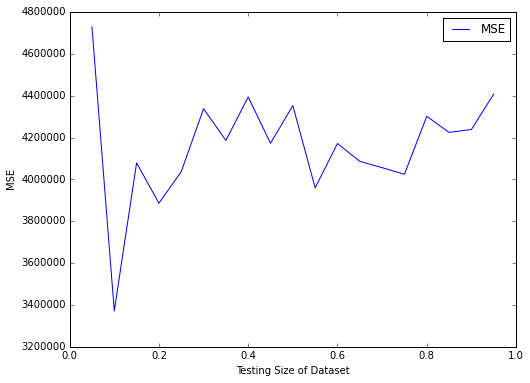

In [131]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(test_size_range, answer_list, 'b-', label = 'MSE')
plt.xlabel('Testing Size of Dataset')
plt.ylabel('MSE')
ax.legend(loc='best')